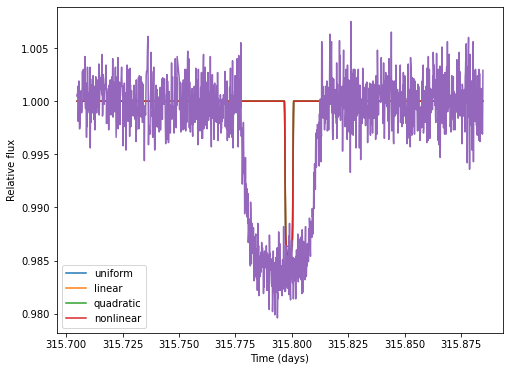

In [5]:
import batman
import numpy as np
import matplotlib.pyplot as plt

# Load the observed light curve data
t, y, err = np.loadtxt('light_curve_GJ1214b.txt', unpack=True)


params = batman.TransitParams()       #object to store transit parameters
params.t0 = t.mean()                        #time of inferior conjunction
params.per = t.max() - t.min()                       #orbital period
params.rp = 0.1169                       #planet radius (in units of stellar radii)
params.a = 14.11                        #semi-major axis (in units of stellar radii)
params.inc = 88.17                      #orbital inclination (in degrees)
params.ecc = 0.27                      #eccentricity
params.w = 0.                        #longitude of periastron (in degrees)
params.limb_dark = "nonlinear"        #limb darkening model
params.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

#t = np.linspace(-0.025, 0.025, 1000)  #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model  (esto sobra?)

#flux = m.light_curve(params)                    #calculates light curve

#radii = np.linspace(0.09, 0.11, 20)
#for r in radii:
 #       params.rp = r                           #updates planet radius
  #      new_flux = m.light_curve(params)        #recalculates light curve


ld_options = ["uniform", "linear", "quadratic", "nonlinear"]
ld_coefficients = [[], [0.3], [0.1, 0.3], [0.5, 0.1, 0.1, -0.1]]

fig = plt.figure(figsize=(8,6))

#params.limb_dark = ld_options[0]          #specifies the LD profile
#params.u = ld_coefficients[0]             #updates LD coefficients
#m = batman.TransitModel(params, t)
#flux = m.light_curve(params)
#plt.plot(t, flux, label = ld_options[0])
for i in range(4):
    params.limb_dark = ld_options[i]          #specifies the LD profile
    params.u = ld_coefficients[i]             #updates LD coefficients
    m = batman.TransitModel(params, t)        #initializes the model
    flux = m.light_curve(params)              #calculates light curve
    plt.plot(t, flux, label = ld_options[i])
plt.plot(t,y)
#plt.xlim((315.7900, 315.8075))
#plt.ylim((0.987, 1.001))
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Relative flux")
plt.savefig("lightcurve_limb_darkenings_datos.png")
plt.show()